<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/RandomForestDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>








# <center> **Cardiovascular Disease Detection System (Heart Failure Prediction)** 

#<center> **using Random Forest**

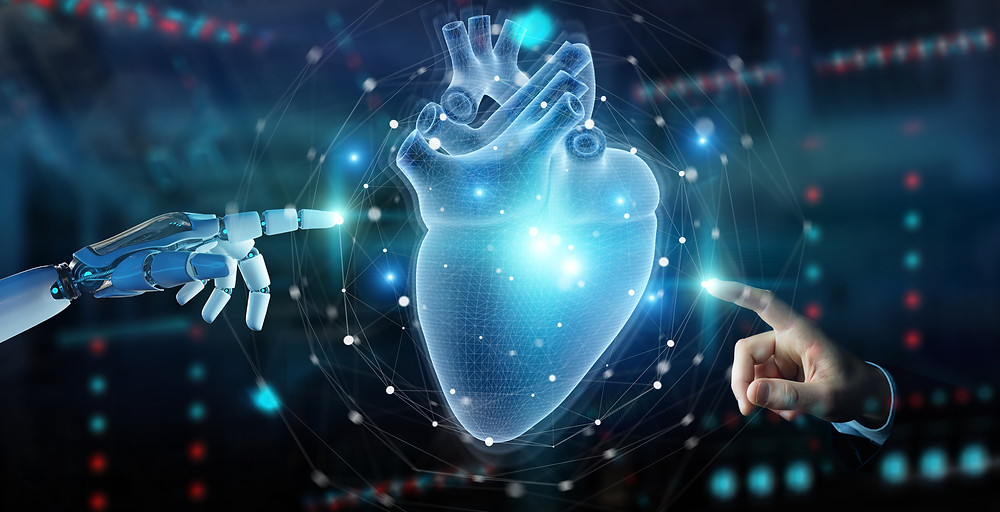

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

Download the dataset using this link: https://drive.google.com/uc?export=download&id=1t4RFxrRwlnc7uos1sWF67iJNg-VWTE0l

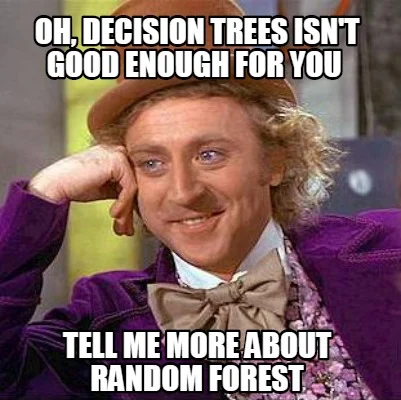

In [ ]:
# import essential files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import dataset file
url = "https://drive.google.com/uc?export=download&id=1t4RFxrRwlnc7uos1sWF67iJNg-VWTE0l" 
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# import dataset
df= pd.read_csv("heart.csv")
df.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


## Exploratory Data Analysis

In [ ]:
# check if there are any missing values in the dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# print the dimensions and datatypes of dataframe
print("Dimensions: ",df.shape)
print("Datatypes: ",df.dtypes)

Dimensions:  (918, 12)
Datatypes:  Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
# convert caregorical columns(which are numerical as per the dataset) into category dtype
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
# make list of numerical and categorical coluumns
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical = ['Sex','ChestPainType','FastingBS','RestingECG','ST_Slope','ExerciseAngina','HeartDisease']
df = df[numerical + categorical]
df.shape

(918, 12)

In [ ]:
# show descriptive analysis for numerical columns
df.describe(include=['int64','float64']).style.background_gradient(cmap = "Blues")
''' or
df[numerical].describe().style.background_gradient(cmap = "Blues")
'''

' or\ndf[numerical].describe().style.background_gradient(cmap = "Blues")\n'

In [ ]:
# show descriptive analysis for categorical columns
df.describe(include = ['object', 'category'])

,Sex,ChestPainType,FastingBS,RestingECG,ST_Slope,ExerciseAngina,HeartDisease
count,918,918,918,918,918,918,918
unique,2,4,2,3,3,2,2
top,M,ASY,0,Normal,Flat,N,1
freq,725,496,704,552,460,547,508


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

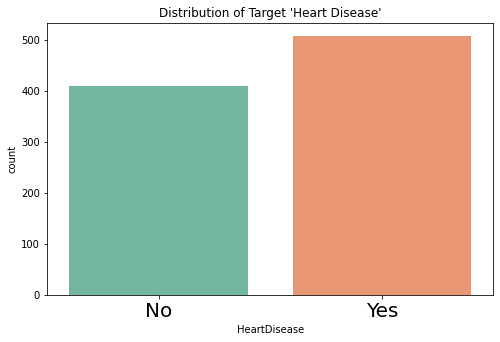

In [ ]:
# create countplot for target variable
plt.figure(figsize=(8, 5))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette='Set2')
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07045b4a10>,
      dtype=object)

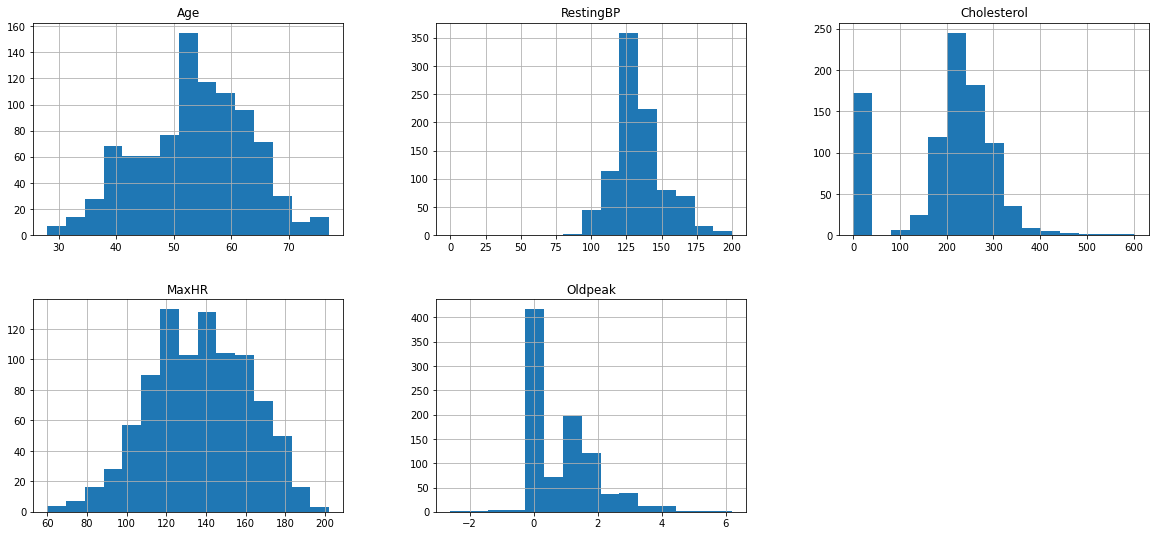

In [ ]:
# create histplots for all numerical columns
df[numerical].hist(bins=15, figsize=(20,9),layout=(2,3))

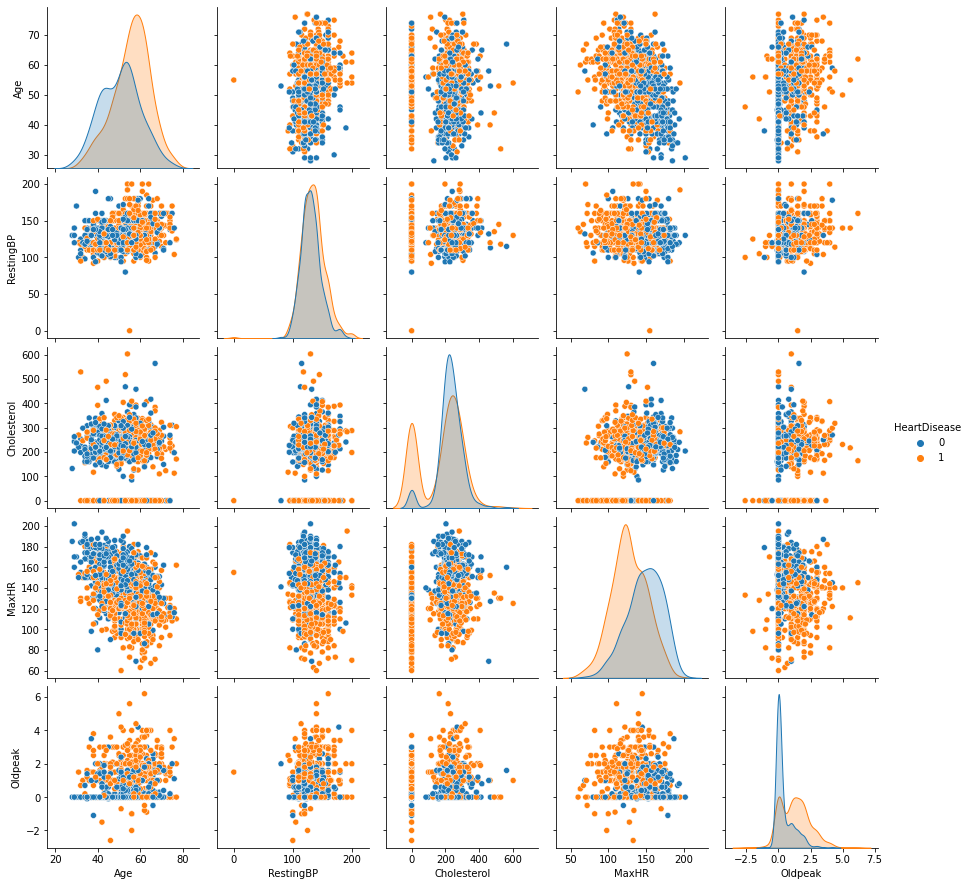

In [ ]:
# create pairplot 
sns.pairplot(df[numerical + ['HeartDisease']], hue='HeartDisease')

In [ ]:
# Interpret the effect of each class from categorical columns on target variable(Heart Disease) using probability 
def probability_calculation(feature, feature_values) : 
  
    first_with_heart_disease = len(df[(df['HeartDisease']==1) & (df[feature]==feature_values[0])])
    num_first_value = len(df[df[feature]==feature_values[0]])

    second_with_heart_disease = len(df[(df['HeartDisease']==1) & (df[feature]==feature_values[1])])
    num_second_value = len(df[df[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

In [ ]:
# probability calculation for "Sex" column
probability_calculation('Sex', ['M', 'F'])


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


In [ ]:
# probability calculation for "ExerciseAngina"
probability_calculation('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [ ]:
# probability calculation for "FastingBS" column
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


### 💡**Interpretation:**

**Sex of Patient:**
- Most heart disease patients are Male than Females
- Males are approximately 3 times more likely to have heart disease than females

**Angina pectoris caused by exercise:**
- 37% of heart Disease Patients have Angina pectoris.
- With Angina, the probability of having heart disease is hight ( Good feature )

**Fasting blood sugar** [1: if FastingBS > 120 mg/dl, 0: otherwise]:
- 33.5% of heart Disease Patients have Fasting blood sugar > 120mg.
- Fasting blood sugar > 120mg, the probability of having heart disease is almost 0.8 ( High )


### Handling Outliers
Sketch Boxplots to check Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

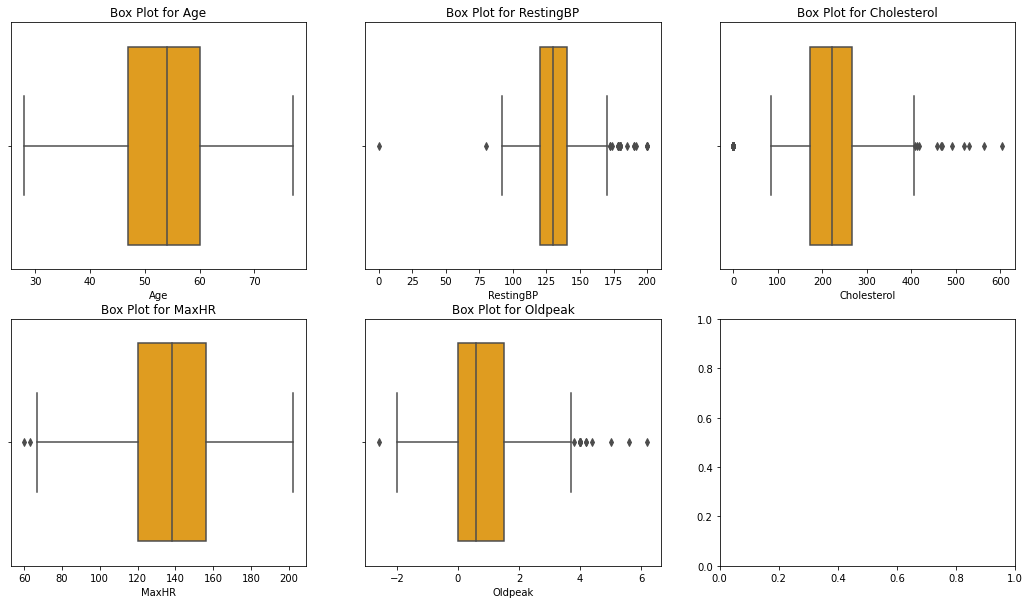

In [ ]:
# Here you'll see How to plot subplots using plt 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
# 2,3 here means we need 2 rows and 3 columns for our figure which will have subplot
# axes is use as coordinates for particular subplot, for e.g axes[0,0] will put subplot in 1st row, 1st column and axes[1,2] in 2nd row, 3rd column
i,j = 0,0
# we have 5 boxplots to plot as a subplots here, so we'll use variables(i&j) to make coordinates for our subplots
for feature in numerical:
  ax = axes[int(i/3),j-3*(int(i/3))]  
  sns.boxplot(df[feature],color="orange",ax=ax)
  ax.set_title(f"Box Plot for {feature}")
  i += 1
  j += 1

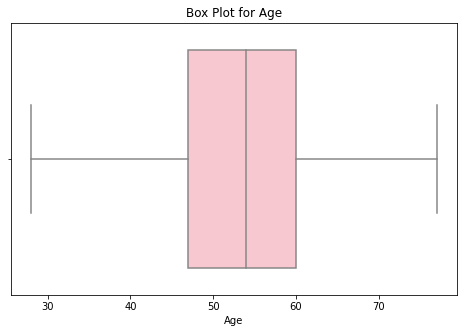

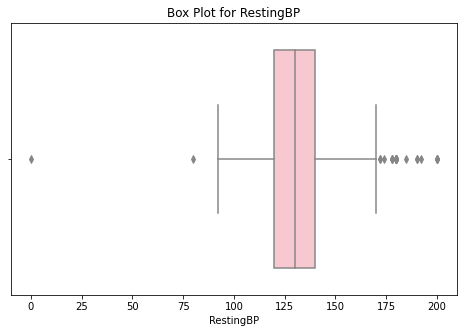

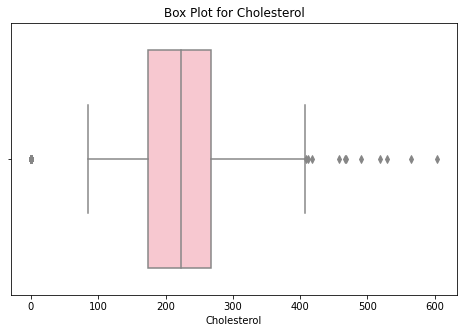

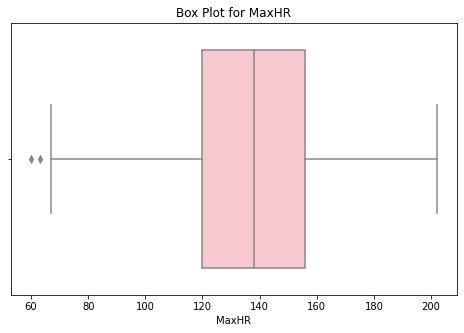

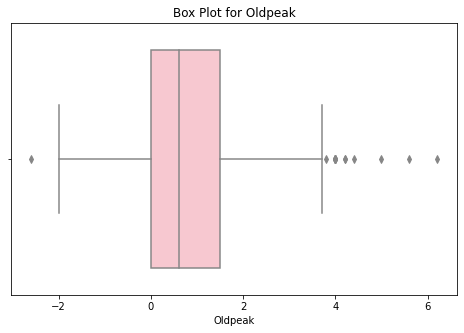

In [ ]:
''' or you can do this as well to sketch box plot simply'''
for feature in numerical:
  plt.figure(figsize=(8, 5))
  ax = sns.boxplot(x=df[feature],color='pink')
  ax.set_title(f"Box Plot for {feature}")

In [ ]:
# Capping the outliers for features having outliers
# we can see that we have to deal with outliers from "RestingBP" and "Cholesterol" column
outlier_features = ["RestingBP","Cholesterol"] 
def treat_outliers(df,feature):
  upper_lim = df[feature].quantile(0.95)
  lower_lim = df[feature].quantile(0.05)
  df[df[feature] > upper_lim][feature] = upper_lim
  df[df[feature] < lower_lim][feature] = lower_lim
  return df[feature]
for feature in outlier_features:
  df[feature] = treat_outliers(df,feature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Feature Encoding
final_df = pd.get_dummies(df, columns=categorical[:-1])
X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']
# feature scaling
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ...,  1.15067399,
         0.8235563 , -0.8235563 ],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.86905588,
         0.8235563 , -0.8235563 ],
       [-1.75135854, -0.12951283,  0.7701878 , ...,  1.15067399,
         0.8235563 , -0.8235563 ],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ..., -0.86905588,
        -1.21424608,  1.21424608],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.86905588,
         0.8235563 , -0.8235563 ],
       [-1.64528563,  0.30282455, -0.21769643, ...,  1.15067399,
         0.8235563 , -0.8235563 ]])

In [ ]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=4)

### Baseline Model

In [ ]:
# build baseline Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
base_model = RandomForestClassifier(n_estimators=5,random_state=0)
#Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. 
#Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.
base_model.fit(X_train,y_train)
# Evaluate training and test accuracy
print("Baseline Training accuracy: ",base_model.score(X_train,y_train))
print("Baseline Test accuracy: ",base_model.score(X_test,y_test))

Baseline Training accuracy:  0.9781976744186046
Baseline Test accuracy:  0.8565217391304348


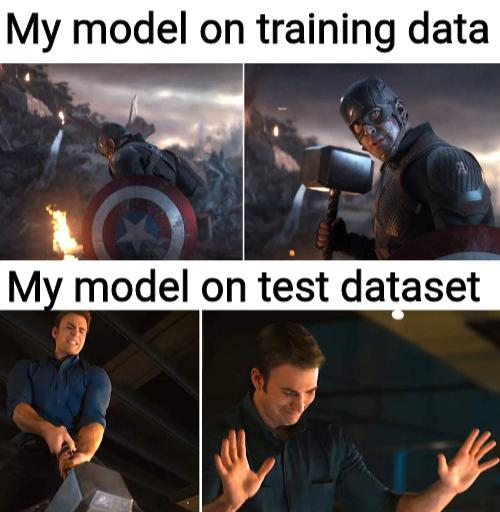

### Random Forest using GridSearchCV
Seems like our baseline model has a lot overfitting, to avoid this we will use GridSearchCV and increase our test accuracy. GridSearchCV is a useful tool to fine tune the parameters of your model. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In [ ]:
# Build Random Forest model using GridSearchCV
# set parameters for gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [5,10,50,100]
}

In [ ]:
# Initiate the grid search model
rf_grids = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, cv=5, verbose=2) # verbose=0 for no details about progress of execution
# Set the verbose parameter in GridSearchCV to a positive number (the greater the number the more detail you will get about progress during the execution).
# Fit the grid search to the data
grid_fit = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_

In [ ]:
# Show the best params of grid search
best_parameters = grid_fit.best_params_
best_parameters

{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
# Evaluate training accuracy
print("Training Accuracy: ",grid_fit.score(X_train,y_train),"\n")
# Evaluate model performance on test data
from sklearn.metrics import classification_report
y_pred = grid_fit.predict(X_test)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9229651162790697 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       105
           1       0.87      0.94      0.90       125

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.89      0.89      0.89       230



[Text(0, 0.5, 'no heart disease'), Text(0, 1.5, 'heart disease')]

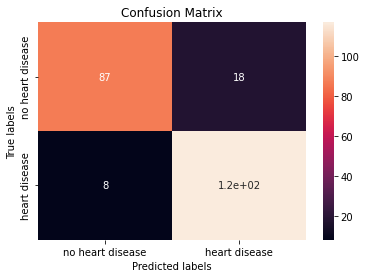

In [ ]:
# Make confusion matrix for test predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm, annot=True) 
cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
cm.set_title('Confusion Matrix')
cm.xaxis.set_ticklabels(['no heart disease', 'heart disease'])
cm.yaxis.set_ticklabels(['no heart disease', 'heart disease'])

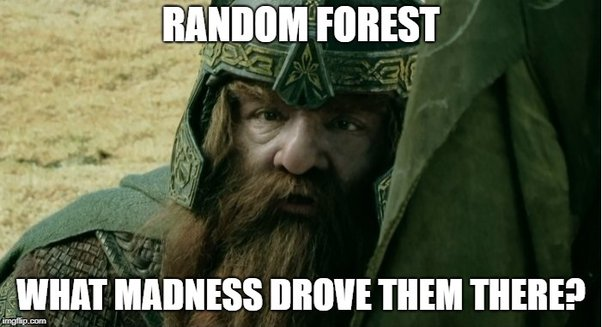

AI in healthcare is an umbrella term to describe the application of machine learning (ML) algorithms and other cognitive technologies in medical settings. AI techniques can help medical researchers deal with the vast amount of data from patients (i.e., medical big data). With machine learning, healthcare service providers can make better decisions on patient's diagnoses and treatment options, which lead to an overall improvement of healthcare services.

**CONGRATULATIONS!** Here we learnt about the applications of machine learning in the medical field through **HEART FAILURE PREDICTION using Random Forest**. 